In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [14]:
movie_budgets_df = pd.read_csv('../../data/tn.movie_budgets.csv.gz', encoding='latin1', index_col=0)
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
movie_gross_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie'})
movie_gross_df

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [15]:
gross_budgets = pd.merge(movie_gross_df, movie_budgets_df, on=['movie'])
#gross_budgets['profit'] = gross_budgets['worldwide_gross'] - gross_budgets['production_budget']

gross_budgets

,movie,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,"Dec 7, 2018","$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,"Feb 2, 2018","$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"


In [19]:
# Clean the worldwide_gross column
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '')


In [20]:
# Convert the column to float
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].astype(float)

In [21]:
# Clean the production_budget column
gross_budgets['production_budget'] = gross_budgets['production_budget'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
gross_budgets['production_budget'] = gross_budgets['production_budget'].astype(float)

In [22]:
# Calculate the profit column
gross_budgets['profit'] = gross_budgets['worldwide_gross'] - gross_budgets['production_budget']
# View the updated dataset
print(gross_budgets[['movie','profit']])

                           movie       profit
0                    Toy Story 3  868879522.0
1                      Inception  675524642.0
2            Shrek Forever After  591244673.0
3     The Twilight Saga: Eclipse  638102828.0
4                     Iron Man 2  451156389.0
...                          ...          ...
1242                       Gotti   -3910900.0
1243                 Ben is Back   -3366889.0
1244  Bilal: A New Breed of Hero  -29351401.0
1245                       Mandy   -4572344.0
1246                Lean on Pete   -5544973.0

[1247 rows x 2 columns]


In [30]:
profit_sorted= gross_budgets.sort_values(by='profit', ascending=False)
topTen = profit_sorted.head(10)

In [69]:
topTen_rev = topTen.iloc[::-1].reset_index(drop=True)
topTen_rev['profit'] = topTen_rev['profit']/1000000
topTen_rev

,movie,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profit
0,Iron Man 3,BV,409000000.0,805800000,2013,"May 3, 2013",200000000.0,"$408,992,272",1.215392e+09,1015.392272
1,Incredibles 2,BV,608600000.0,634200000,2018,"Jun 15, 2018",200000000.0,"$608,581,744",1.242521e+09,1042.520711
2,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,"May 1, 2015",330600000.0,"$459,005,868",1.403014e+09,1072.413963
3,Minions,Uni.,336000000.0,823400000,2015,"Jul 10, 2015",74000000.0,"$336,045,770",1.160336e+09,1086.336173
4,Frozen,BV,400700000.0,875700000,2013,"Nov 22, 2013",150000000.0,"$400,738,009",1.272470e+09,1122.469910
5,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018,"Jun 22, 2018",170000000.0,"$417,719,760",1.305773e+09,1135.772799
6,Black Panther,BV,700100000.0,646900000,2018,"Feb 16, 2018",200000000.0,"$700,059,566",1.348258e+09,1148.258224
7,Furious 7,Uni.,353000000.0,"1,163.0",2015,"Apr 3, 2015",190000000.0,"$353,007,020",1.518723e+09,1328.722794
8,Jurassic World,Uni.,652300000.0,"1,019.4",2015,"Jun 12, 2015",215000000.0,"$652,270,625",1.648855e+09,1433.854864
9,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,"Apr 27, 2018",300000000.0,"$678,815,482",2.048134e+09,1748.134200


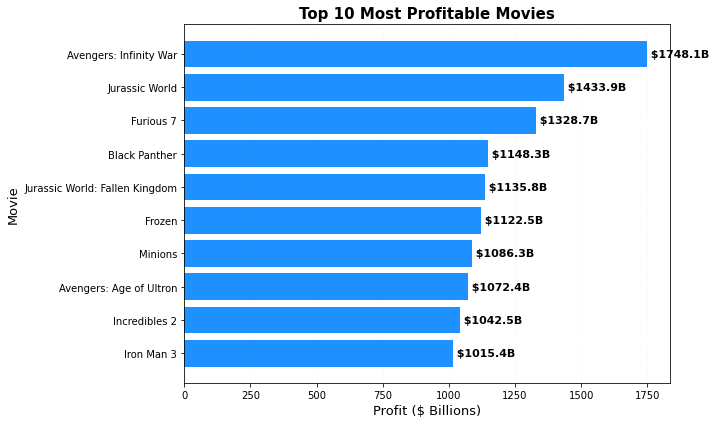

In [71]:
#Plotting
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(topTen_rev['movie'], topTen_rev['profit'], color='dodgerblue')

#Title and labels
ax.set_title('Top 10 Most Profitable Movies', fontweight='bold', fontsize=15)
ax.set_xlabel('Profit ($ Billions)', fontsize=13)
ax.set_ylabel('Movie', fontsize=13)
ax.grid(axis='x', linestyle='--', alpha = 0.07)


for index, value in enumerate(topTen_rev['profit']):
    
    formatted_value = "${:.1f}B".format(value)
    ax.text(value, index, ' ' + str(formatted_value), va='center', fontweight = 'bold', fontsize =11)

plt.tight_layout()
plt.show()

In [87]:
profit_sorted= gross_budgets.sort_values(by='profit', ascending=False)
bot_Ten = profit_sorted.tail(10)


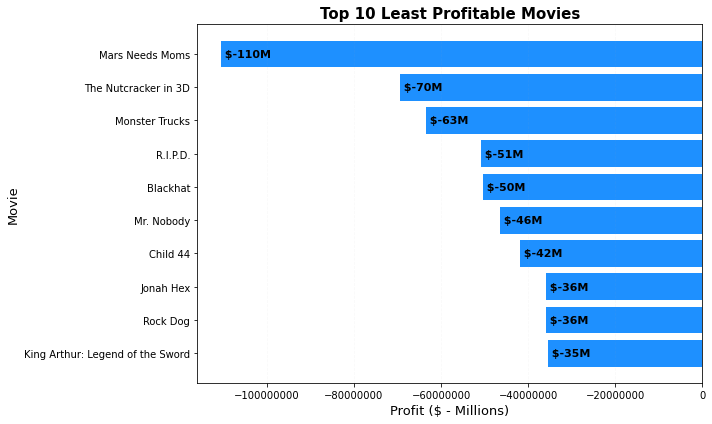

In [102]:
    #Plotting
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(bot_Ten['movie'], bot_Ten['profit'], color='dodgerblue')

#Title and labels
ax.set_title('Top 10 Least Profitable Movies', fontweight='bold', fontsize=15)
ax.set_xlabel('Profit ($ - Millions)', fontsize=13)
ax.set_ylabel('Movie', fontsize=13)
ax.grid(axis='x', linestyle='--', alpha = 0.07)
ax.ticklabel_format(style='plain', axis='x', useOffset=False)

for index, value in enumerate(bot_Ten['profit']):
        short_value = abs(value) / 1000000
        formatted_value = "$-{:.0f}M".format(short_value)
        ax.text(value, index, ' ' + str(formatted_value), va='center', fontweight = 'bold', fontsize =11)


plt.tight_layout()
plt.show()

In [62]:
profit_ten = profit_sorted[profit_sorted['production_budget'] < 10000000]
profit_ten = profit_ten.head(10)
profit_ten = profit_ten.iloc[::-1].reset_index(drop=True)
profit_ten['profit'] = profit_ten['profit']/1000000

In [63]:
profit_ten

,movie,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profit
0,Paranormal Activity 4,Par.,53900000.0,88900000,2012,"Oct 19, 2012",5000000.0,"$53,900,335",142817992.0,137.817992
1,Lights Out,WB (NL),67300000.0,81600000,2016,"Jul 22, 2016",5000000.0,"$67,268,835",148806510.0,143.806510
2,Insidious Chapter 2,FD,83600000.0,78300000,2013,"Sep 13, 2013",5000000.0,"$83,586,447",161921515.0,156.921515
3,Magic Mike,WB,113700000.0,53500000,2012,"Jun 29, 2012",7000000.0,"$113,721,571",170549753.0,163.549753
4,Paranormal Activity 2,Par.,84800000.0,92800000,2010,"Oct 20, 2010",3000000.0,"$84,752,907",177512032.0,174.512032
5,Paranormal Activity 3,Par.,104000000.0,103000000,2011,"Oct 21, 2011",5000000.0,"$104,028,807",207039844.0,202.039844
6,Annabelle,WB (NL),84300000.0,172800000,2014,"Oct 3, 2014",6500000.0,"$84,273,813",256862920.0,250.362920
7,Get Out,Uni.,176000000.0,79400000,2017,"Feb 24, 2017",5000000.0,"$176,040,665",255367951.0,250.367951
8,Split,Uni.,138300000.0,140200000,2017,"Jan 20, 2017",5000000.0,"$138,141,585",278964806.0,273.964806
9,Dangal,UTV,12400000.0,290500000,2016,"Dec 21, 2016",9500000.0,"$12,391,761",294654618.0,285.154618


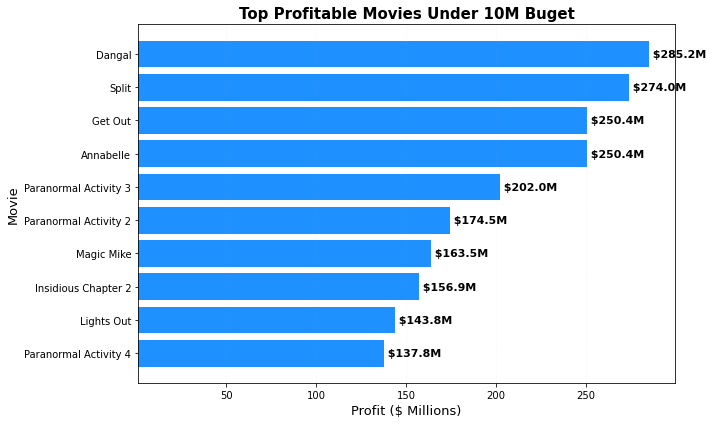

In [68]:
#Plotting
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(profit_ten['movie'], profit_ten['profit'], color='dodgerblue')

#Title and labels
ax.set_title('Top Profitable Movies Under 10M Buget', fontweight='bold', fontsize=15)
ax.set_xlabel('Profit ($ Millions)', fontsize=13)
ax.set_ylabel('Movie', fontsize=13)
ax.grid(axis='x', linestyle='--', alpha = 0.07)
ax.set_xlim(1, ax.get_xlim()[1])
ax.ticklabel_format(style='plain', axis='x', useOffset=False)

for index, value in enumerate(profit_ten['profit']):
    
    formatted_value = "${:.1f}M".format(value)
    ax.text(value, index, ' ' + str(formatted_value), va='center', fontweight = 'bold', fontsize =11)
    
    

plt.tight_layout()
plt.show()